In [299]:
import matplotlib.pyplot as plt
import numbers
import pandas as pd
import plotly.express as px
import seaborn as sns
from test import connect, postgresql_to_dataframe

db_conc = {
    "host"      : "suicide-db.cfnbykir9i4m.us-east-1.rds.amazonaws.com",
    "database"  : "suicide",
    "user"      : "postgres",
    "password"  : "Password"
}
column_names = ["Id", "country", "year", "sex", "age", "suicides_no", "population", "suicides/100k_pop", "country_year", "HDI_for_year", "gdp_for_year", "gdp_per_capita", "generation"]


In [300]:
#Load data from Postgres into dataframe
conn = connect(db_conc)
df = postgresql_to_dataframe(conn, "select * from public.suicide", column_names)
df.tail()

,Id,country,year,sex,age,suicides_no,population,suicides/100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27815,27816,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Generation X
27816,27817,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Silent
27817,27818,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Generation Z
27818,27819,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Generation Z
27819,27820,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309.0,Boomers


In [301]:
df.describe()

,Id,year,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,13910.500000,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8031.086581,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,6955.750000,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,13910.500000,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,20865.250000,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,27820.000000,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Id


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 720x360 with 0 Axes>

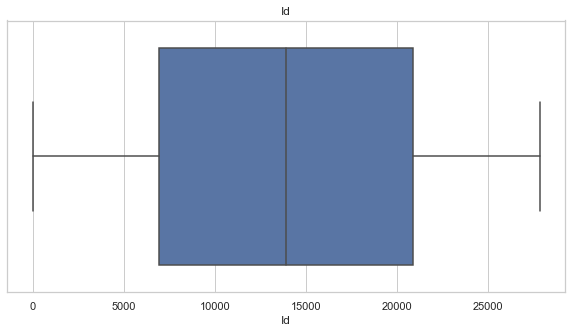

year


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



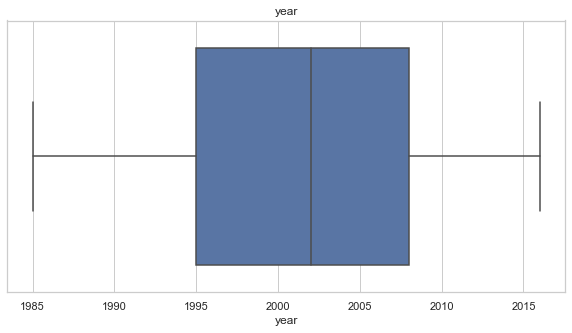

suicides_no


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



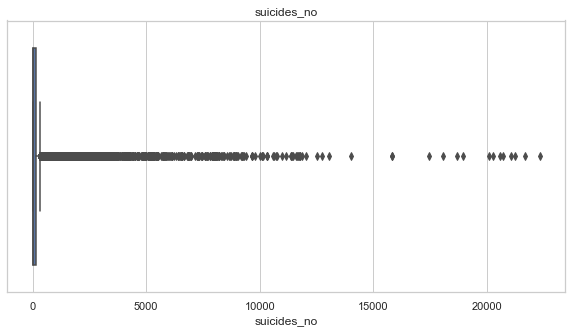

population


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



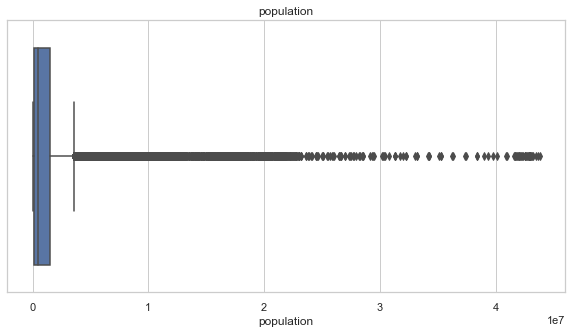

suicides/100k_pop


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



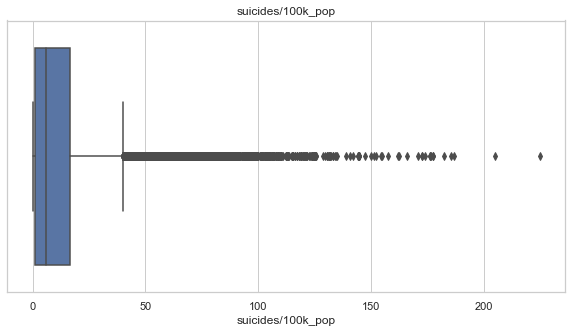

HDI_for_year


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



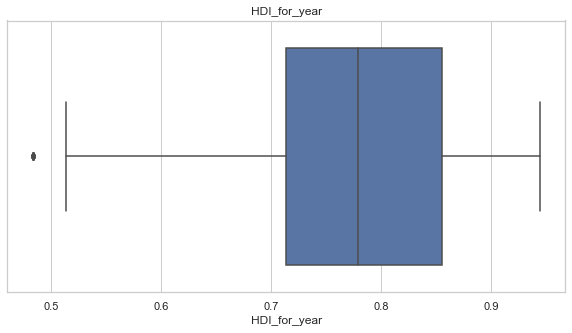

gdp_per_capita


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



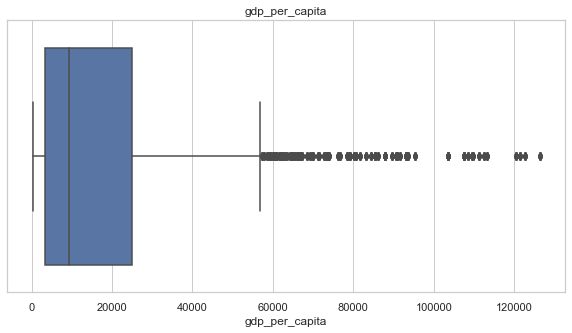

In [302]:
plt.figure(figsize=(10,5))
for i in df.columns:
    if (isinstance(df[i][0], numbers.Number)):
        plt.figure(figsize=(10,5))
        print(i)
        sns.set(style='whitegrid')
        sns.boxplot(df[i]).set(title=i)
        plt.show()

In [303]:
# counts % of null values per column
df.isnull().sum()/df.count()[1]
# df.count()

Id                   0.000000
country              0.000000
year                 0.000000
sex                  0.000000
age                  0.000000
suicides_no          0.000000
population           0.000000
suicides/100k_pop    0.000000
country_year         0.000000
HDI_for_year         0.699353
gdp_for_year         0.000000
gdp_per_capita       0.000000
generation           0.000000
dtype: float64

In [304]:
df2 = df[df["HDI_for_year"].isnull()]
# .groupby("country")["year"].value_counts().to_frame()
# df[df["HDI_for_year"].isnull()].groupby("country")
df2["year"].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2001,
       2002, 2003, 2004, 2006, 2007, 2008, 2009, 1985, 1986, 1990, 1991,
       1995, 2000, 2005, 2015, 2016, 2010, 2011, 2012, 2013, 2014])

In [305]:
# Loads additional HDI data 
hdi_df = pd.read_csv("AHDI_1.1-1.csv", index_col=0)
hdi_df.dropna(how='all', axis=0, inplace=True)
# hdi_df.loc["Argentina"][str(1900)]
years = hdi_df.columns[1:].astype('uint64', copy=True)
years

# Replaces as many null HDI spots as possible with either the exact HDI from hdi_df 
# or an average of the HDI for the neighboring years (if the exact year is not in hdi_df)
for i in null_indices:
    row = df.loc[i]
#     print(row['country'], row['year'])
    try:
        if row['country'] in hdi_df.index:
            
            if hdi_df.loc[row['country']][str(row['year'])]:
#                 print(hdi_df.loc[row['country']][str(row['year'])])
                df.at[i, 'HDI_for_year'] = hdi_df.loc[row['country']][str(row['year'])]
    except:
#         print('\t', years[years.size - 1])
        if row['year'] > years[years.size - 1]:
            row_year = years.size - 1
            df.at[i, 'HDI_for_year'] = hdi_df.loc[row['country']][row_year]
        elif row['year'] < years[0]:
            row_year = 0
            df.at[i, 'HDI_for_year'] = hdi_df.loc[row['country']][row_year]
        else:
            row_year = years.searchsorted(row.year)
            df.at[i, 'HDI_for_year'] = (hdi_df.loc[row['country']][row_year] +
                                   hdi_df.loc[row['country']][row_year-1])/2

print("done!")

done!


In [306]:
df.describe()

,Id,year,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,25794.000000,27820.000000
mean,13910.500000,2001.258375,242.574407,1.844794e+06,12.816097,0.579827,16866.464414
std,8031.086581,8.469055,902.047917,3.911779e+06,18.961511,0.189913,18887.576472
min,1.000000,1985.000000,0.000000,2.780000e+02,0.000000,0.156000,251.000000
25%,6955.750000,1995.000000,3.000000,9.749850e+04,0.920000,0.418000,3447.000000
50%,13910.500000,2002.000000,25.000000,4.301500e+05,5.990000,0.595500,9372.000000
75%,20865.250000,2008.000000,131.000000,1.486143e+06,16.620000,0.729000,24874.000000
max,27820.000000,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Id


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 720x360 with 0 Axes>

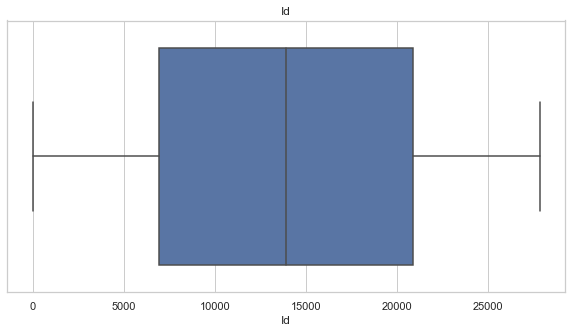

year


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



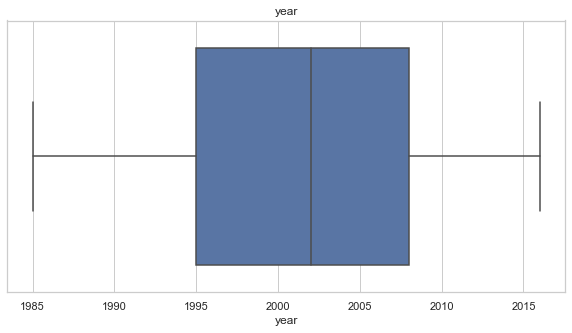

suicides_no


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



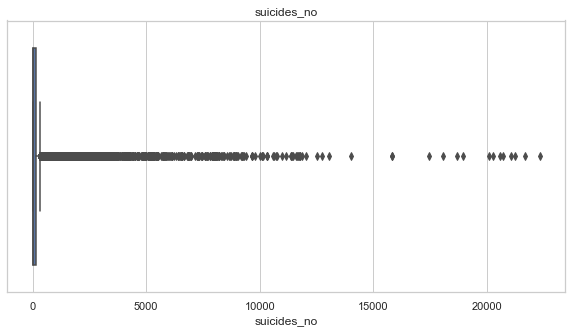

population


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



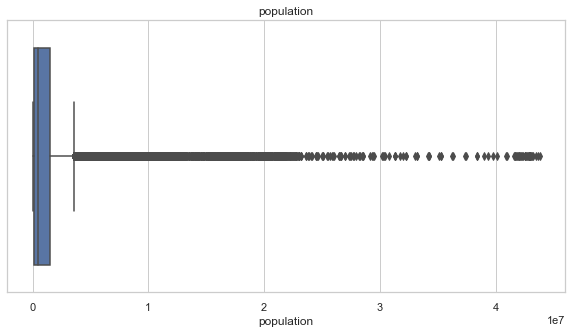

suicides/100k_pop


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



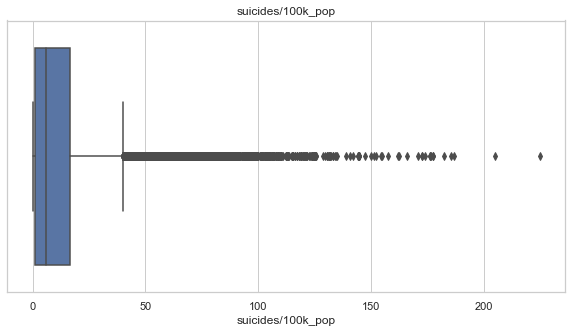

HDI_for_year


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



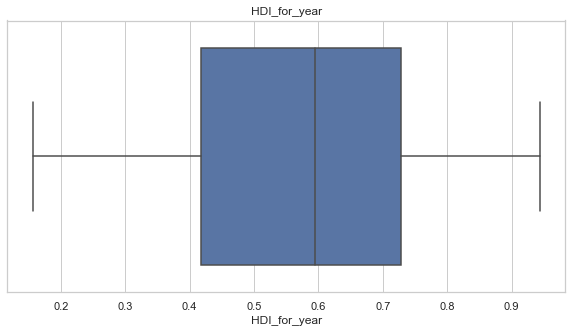

gdp_per_capita


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



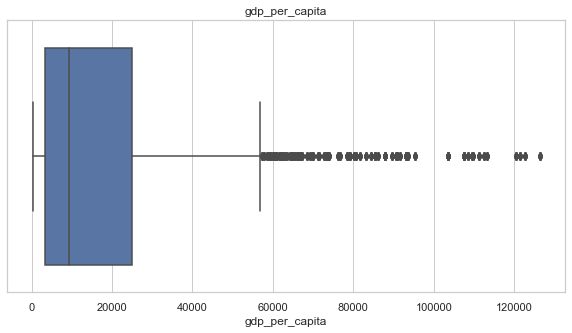

In [307]:
plt.figure(figsize=(10,5))
for i in df.columns:
    if (isinstance(df[i][0], numbers.Number)):
        plt.figure(figsize=(10,5))
        print(i)
        sns.set(style='whitegrid')
        sns.boxplot(df[i]).set(title=i)
        plt.show()

In [308]:
# counts % of null values per column after fixing null values in HDI_for_year
df.isnull().sum()/df.count()[1]

Id                   0.000000
country              0.000000
year                 0.000000
sex                  0.000000
age                  0.000000
suicides_no          0.000000
population           0.000000
suicides/100k_pop    0.000000
country_year         0.000000
HDI_for_year         0.072825
gdp_for_year         0.000000
gdp_per_capita       0.000000
generation           0.000000
dtype: float64

In [309]:
df = px.data.gapminder()
fig = px.line(df, x="year", y="suicides_no", color="country", line_group="country", hover_name="country",
        line_shape="spline", render_mode="svg")
fig.show()


In [313]:
df.groupby('country')['suicides_no'].sum()

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

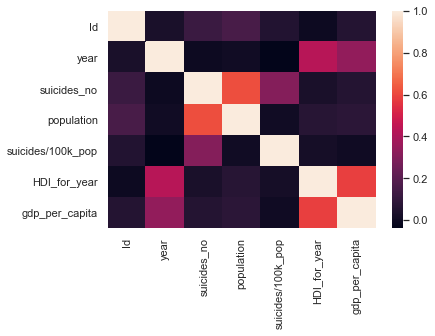

In [280]:
sns.heatmap(df.corr())
plt.show()

In [14]:
df.corr()

,Id,year,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_per_capita
Id,1.000000,0.033693,0.119583,0.158439,0.056052,0.003852,0.059788
year,0.033693,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,0.119583,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.158439,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k_pop,0.056052,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI_for_year,0.003852,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita,0.059788,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000
